```Step 1: Load the Dataset```

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [336]:
df = pd.read_csv("/content/real_world_car_rental_data.csv")

```Step 2: Understand the Dataset```

In [337]:
df.head()

,Car Make,Car Model,Year of Manufacture,Mileage (in km),Fuel Type,Engine Size (L),Location,Rental Duration (days),Car Condition,Demand,Daily Rental Price
0,Chevrolet,Sedan,2007,16116,Hybrid,1.4,Dallas,29,Old,Low,61.516958
1,Honda,Convertible,2014,70794,Hybrid,2.9,Los Angeles,26,Old,Medium,41.749576
2,Kia,Truck,2007,136354,Diesel,5.0,New York,3,Old,Medium,16.358481
3,Nissan,Convertible,2016,137970,Petrol,5.5,Phoenix,15,Well-Maintained,Low,41.533249
4,Chevrolet,Convertible,2011,9135,Hybrid,2.0,Chicago,3,New,Medium,79.267099


In [338]:
df.tail()

,Car Make,Car Model,Year of Manufacture,Mileage (in km),Fuel Type,Engine Size (L),Location,Rental Duration (days),Car Condition,Demand,Daily Rental Price
995,Tesla,Coupe,2011,98344,Petrol,1.8,New York,27,New,Medium,77.511444
996,Tesla,SUV,2001,160344,Petrol,4.7,San Francisco,9,New,High,47.529710
997,Kia,SUV,2006,52153,Electric,2.0,Dallas,27,Old,Medium,51.305898
998,BMW,Sedan,2015,113042,Electric,1.3,San Francisco,9,New,High,74.298615
999,Mercedes,SUV,2002,59110,Electric,3.8,Dallas,14,Old,High,34.992383


In [339]:
df.shape

(1000, 11)

In [340]:
df.columns

Index(['Car Make', 'Car Model', 'Year of Manufacture', 'Mileage (in km)',
       'Fuel Type', 'Engine Size (L)', 'Location', 'Rental Duration (days)',
       'Car Condition', 'Demand', 'Daily Rental Price'],
      dtype='object')

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Car Make                1000 non-null   object 
 1   Car Model               1000 non-null   object 
 2   Year of Manufacture     1000 non-null   int64  
 3   Mileage (in km)         1000 non-null   int64  
 4   Fuel Type               1000 non-null   object 
 5   Engine Size (L)         1000 non-null   float64
 6   Location                1000 non-null   object 
 7   Rental Duration (days)  1000 non-null   int64  
 8   Car Condition           1000 non-null   object 
 9   Demand                  1000 non-null   object 
 10  Daily Rental Price      1000 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


In [342]:
df.nunique()

,0
Car Make,10
Car Model,6
Year of Manufacture,24
Mileage (in km),999
Fuel Type,4
Engine Size (L),51
Location,7
Rental Duration (days),29
Car Condition,3
Demand,3


```Step 3: Handle Missing Values```

In [343]:
df.isnull().sum()

,0
Car Make,0
Car Model,0
Year of Manufacture,0
Mileage (in km),0
Fuel Type,0
Engine Size (L),0
Location,0
Rental Duration (days),0
Car Condition,0
Demand,0


<Axes: >

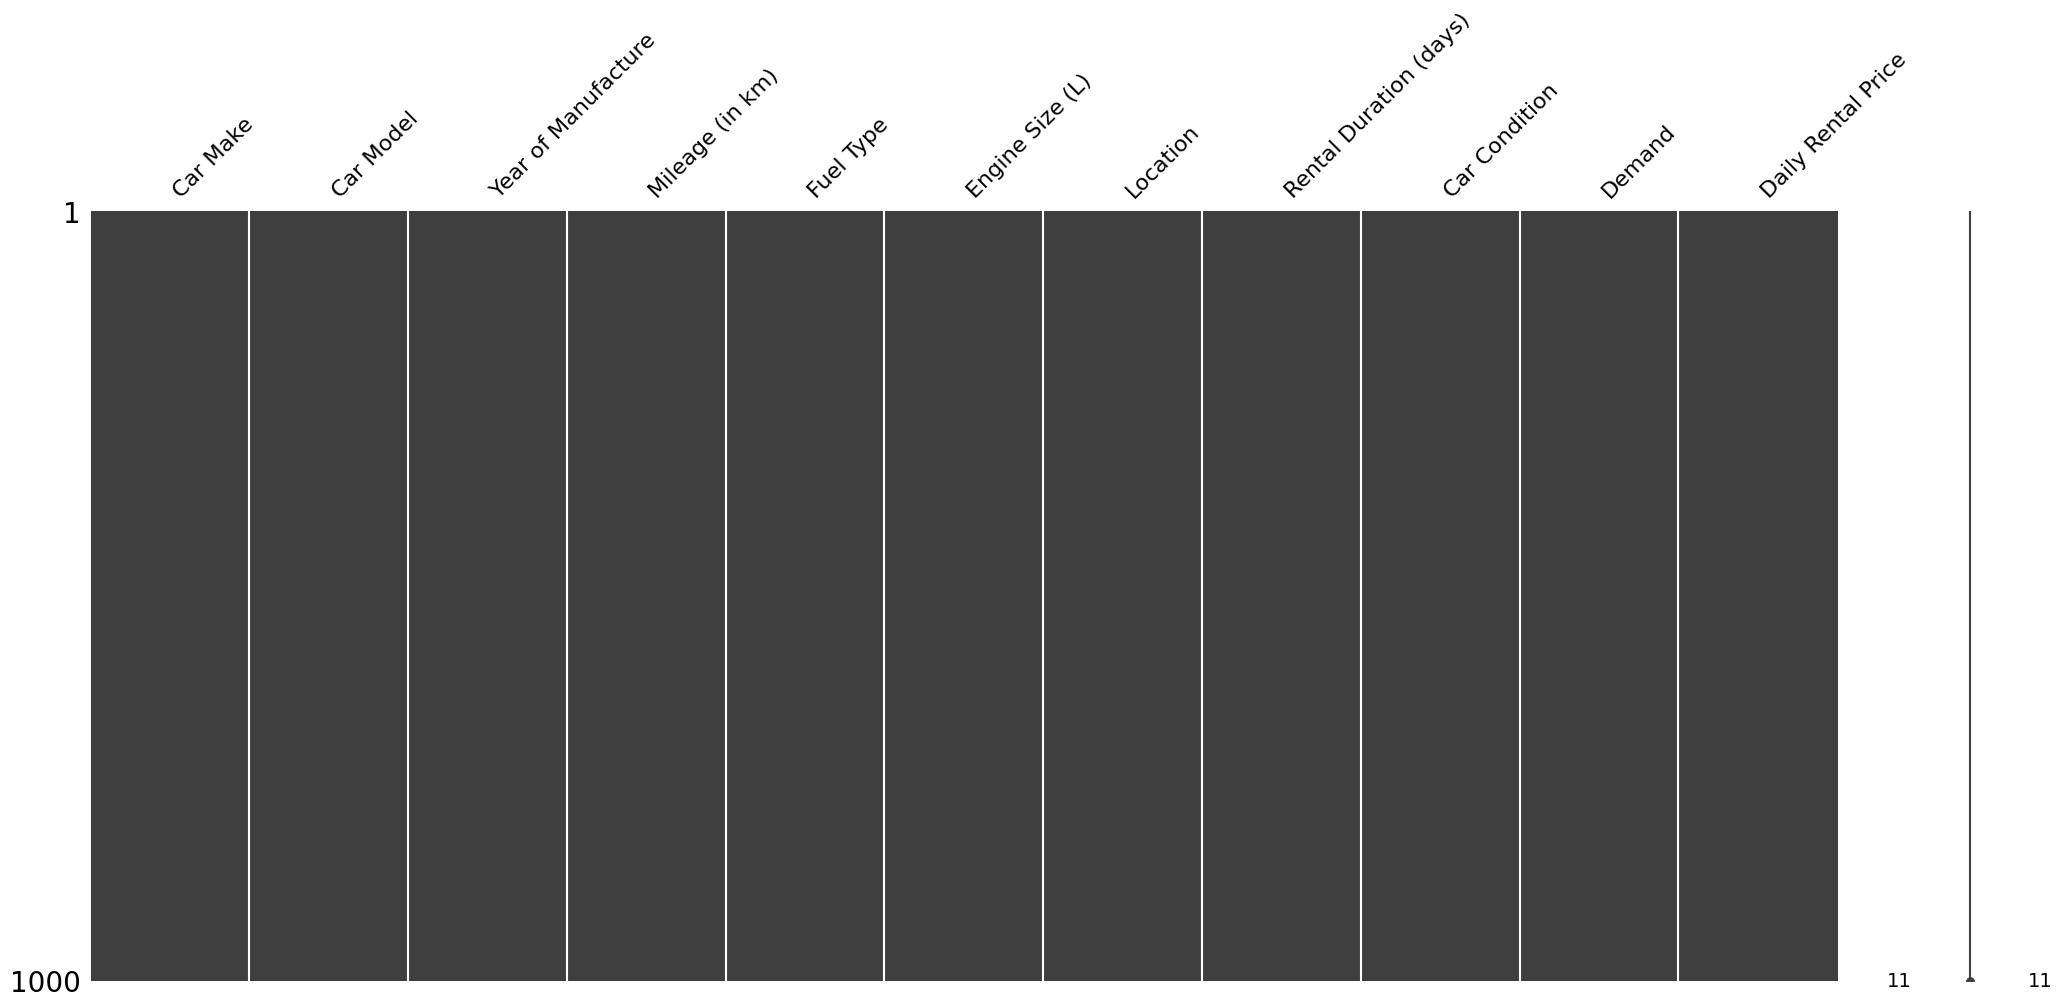

In [344]:
import missingno as msno
msno.matrix(df)

In [345]:
df.dropna(inplace=True)

```Step 4: Handle Duplicates```

In [346]:
df.duplicated().sum()

0

In [347]:
df.drop_duplicates(inplace=True)

```Step 5: Summary Statistics```

In [348]:
+df.describe()

,Year of Manufacture,Mileage (in km),Engine Size (L),Rental Duration (days),Daily Rental Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2011.582000,103213.500000,3.463300,15.209000,50.242602
std,6.967914,57017.393009,1.432975,8.231955,20.413828
min,2000.000000,5138.000000,1.000000,1.000000,15.000000
25%,2005.000000,54871.000000,2.200000,8.000000,34.286227
50%,2012.000000,101008.500000,3.400000,15.500000,49.914859
75%,2018.000000,153945.500000,4.700000,22.000000,66.532010
max,2023.000000,199994.000000,6.000000,29.000000,100.870367


In [349]:
df.describe(include='object')

,Car Make,Car Model,Fuel Type,Location,Car Condition,Demand
count,1000,1000,1000,1000,1000,1000
unique,10,6,4,7,3,3
top,Toyota,SUV,Petrol,San Francisco,Well-Maintained,Medium
freq,118,176,275,162,349,347


In [350]:
df.select_dtypes(include=np.number).skew()  # Measures asymmetry for numerical columns
df.select_dtypes(include=np.number).kurt()  # Measures tail distribution for numerical columns

,0
Year of Manufacture,-1.248976
Mileage (in km),-1.247453
Engine Size (L),-1.188243
Rental Duration (days),-1.174943
Daily Rental Price,-0.933796


```Step 6: Identify Outliers```

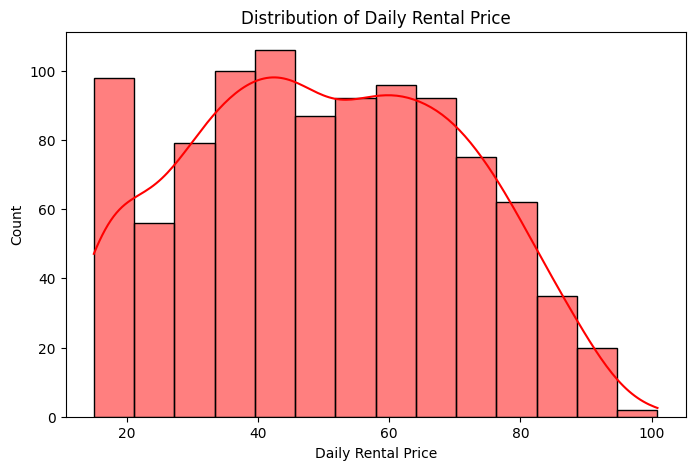

In [351]:
#Distribution of target variable
plt.figure(figsize=(8,5))
sns.histplot(df['Daily Rental Price'],kde=True,color='red')
plt.title('Distribution of Daily Rental Price')
plt.show()

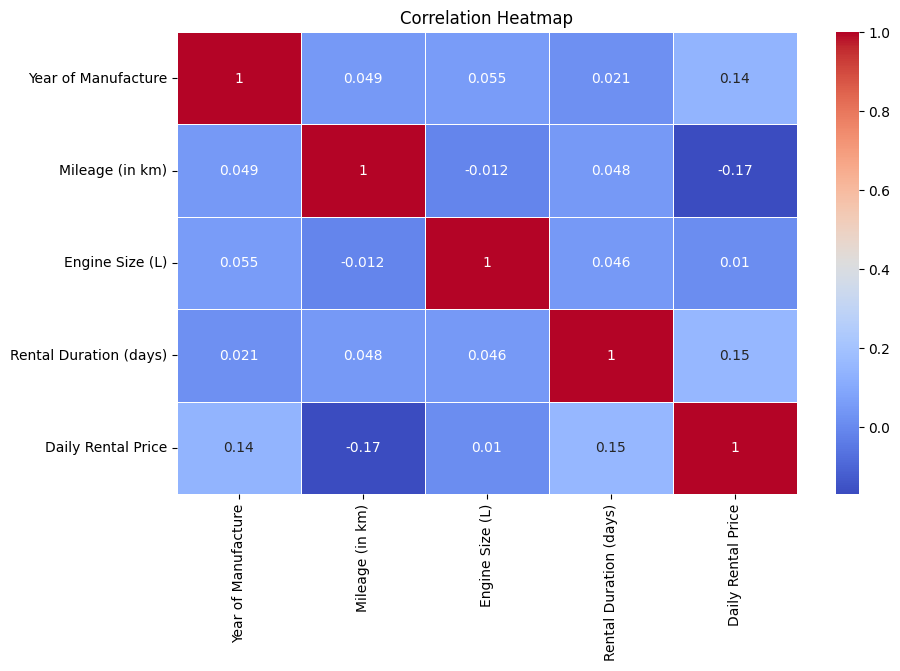

In [352]:
# Correlation heatmap
plt.figure(figsize=(10,6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [353]:
correlation_matrix

,Year of Manufacture,Mileage (in km),Engine Size (L),Rental Duration (days),Daily Rental Price
Year of Manufacture,1.000000,0.048701,0.055245,0.020634,0.140356
Mileage (in km),0.048701,1.000000,-0.012463,0.048073,-0.169373
Engine Size (L),0.055245,-0.012463,1.000000,0.045736,0.010013
Rental Duration (days),0.020634,0.048073,0.045736,1.000000,0.153392
Daily Rental Price,0.140356,-0.169373,0.010013,0.153392,1.000000


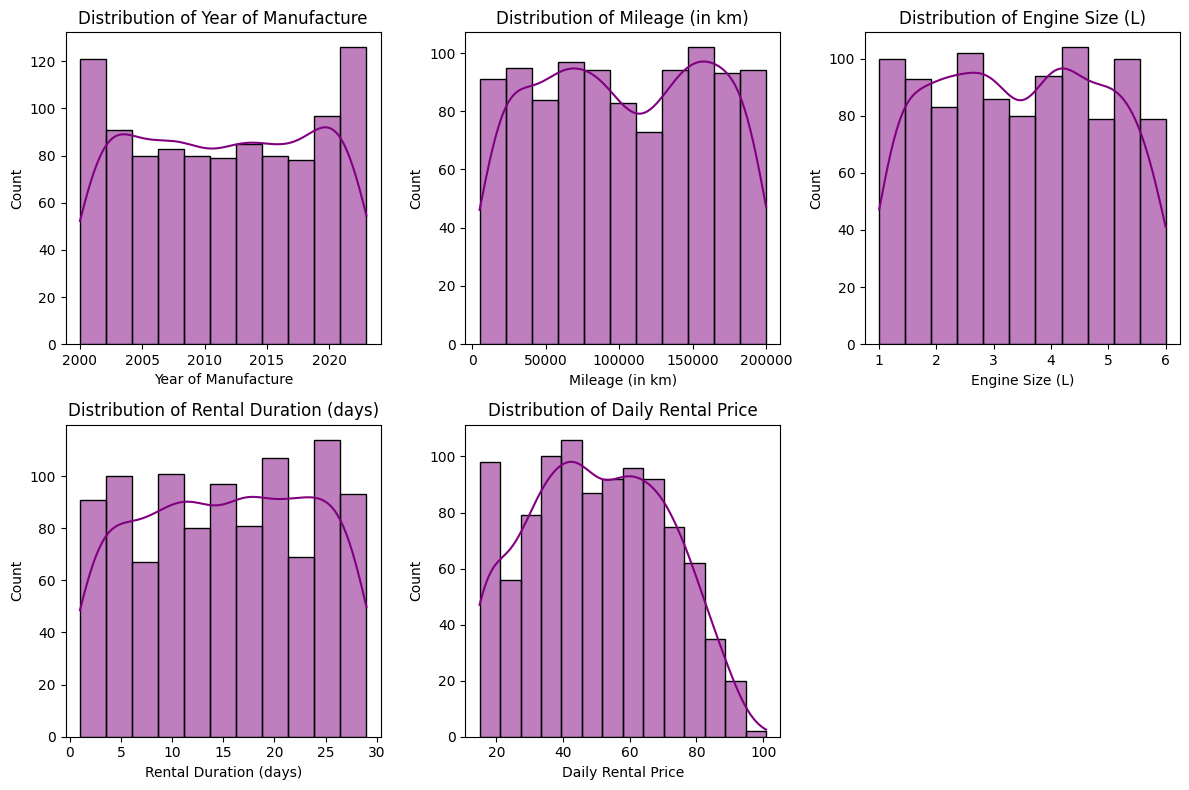

In [354]:

#Distribution of numerical featurs
plt.figure(figsize=(12,8))
for i , column in enumerate(numerical_df,1):
  plt.subplot(2,3,i)
  sns.histplot(df[column],kde=True,color='purple')
  plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()



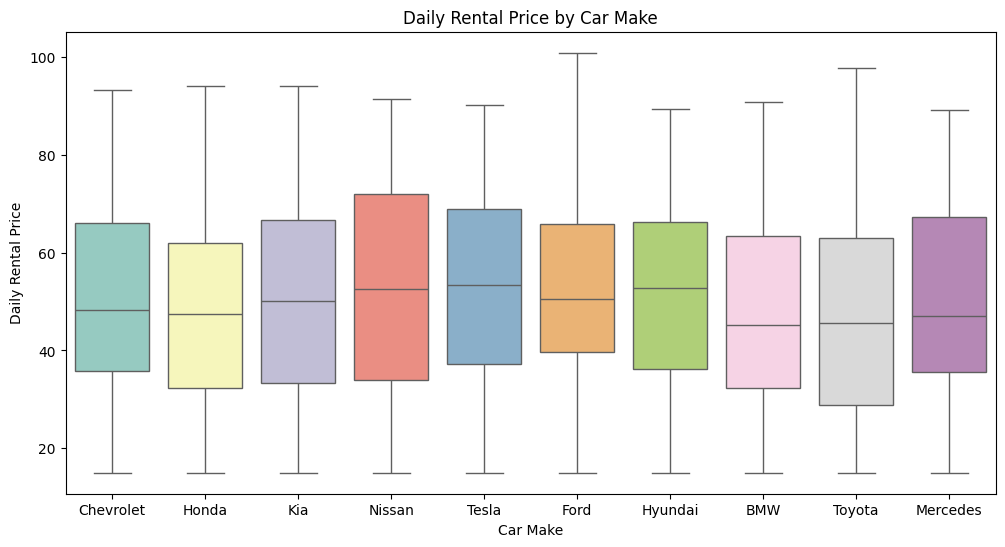

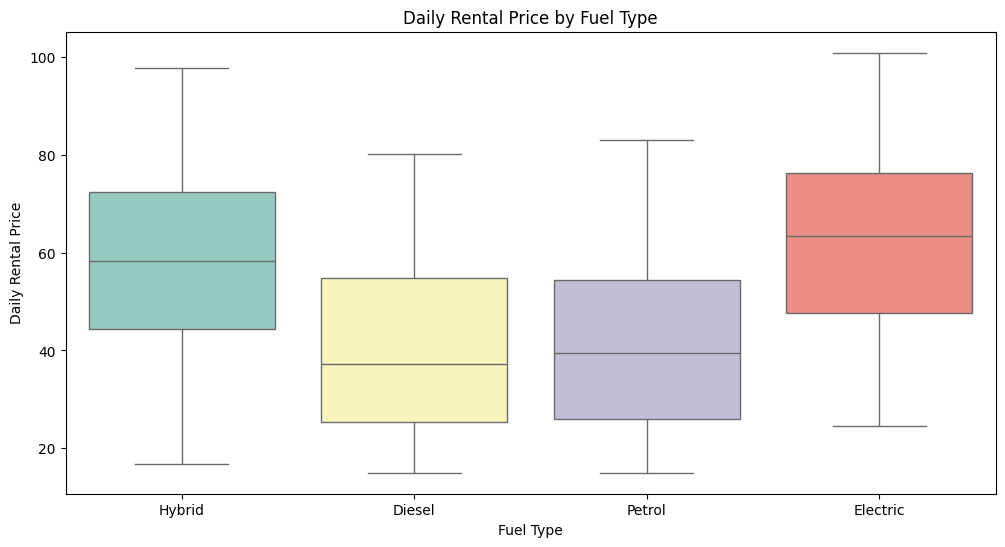

In [355]:


#Boxplot for Daily Rendal Price by car name
plt.figure(figsize=(12,6))
sns.boxplot(x='Car Make',y='Daily Rental Price',data=df,palette='Set3')
plt.title('Daily Rental Price by Car Make')
plt.show()
#Box for Daily rental Price by fule type
plt.figure(figsize=(12,6))
sns.boxplot(x='Fuel Type',y='Daily Rental Price',data=df,palette='Set3')
plt.title('Daily Rental Price by Fuel Type')
plt.show()


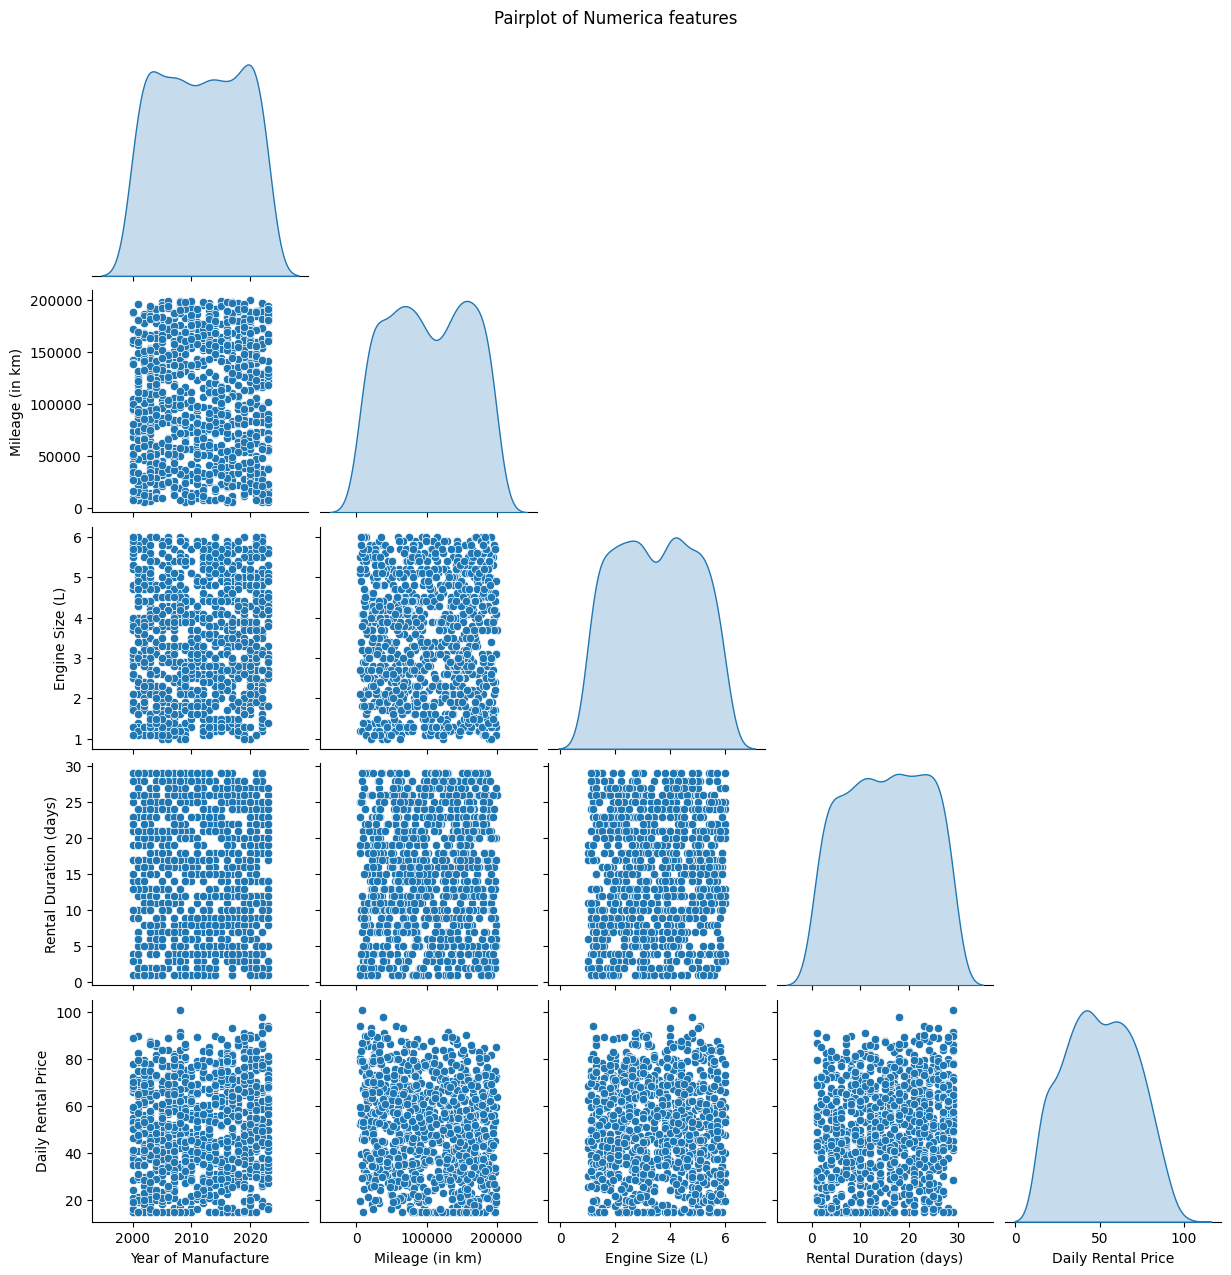

In [356]:
#Pairplot for numerical features
sns.pairplot(numerical_df,diag_kind='kde',corner=True)
plt.suptitle("Pairplot of Numerica features",y=1.02)
plt.show()



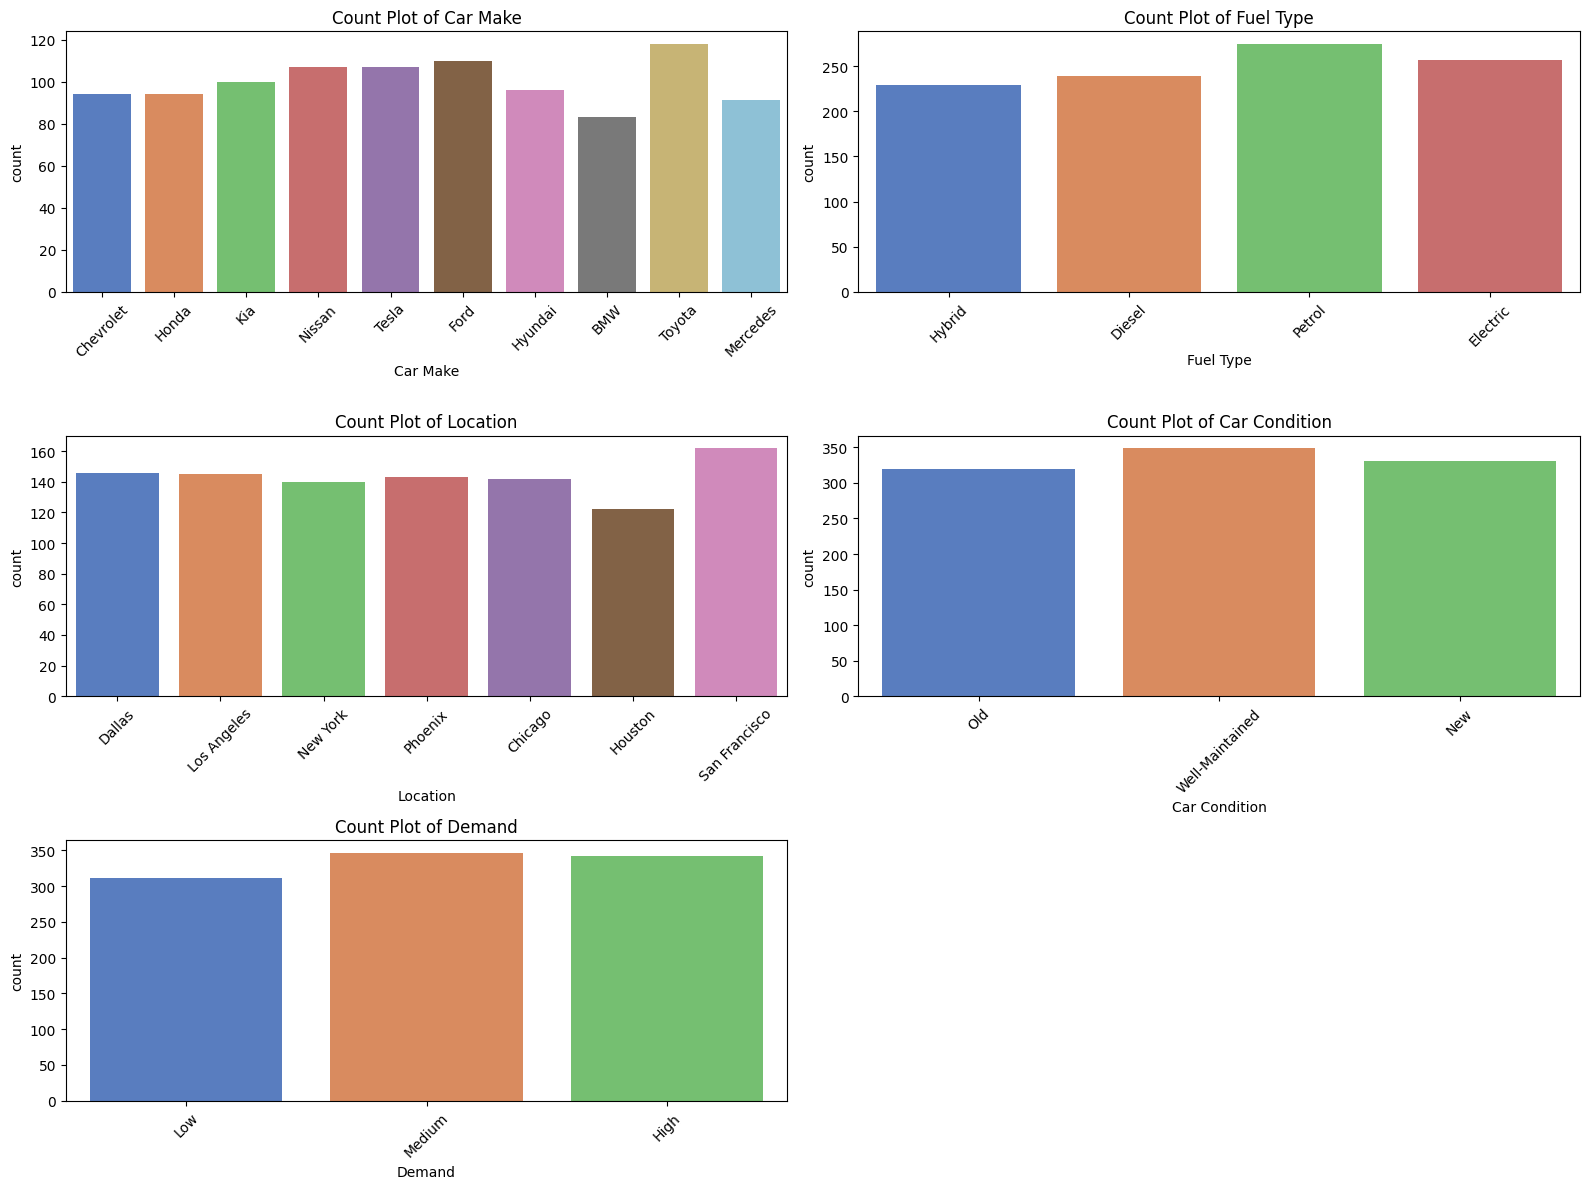

In [357]:
# Count plots for categorical variables
categorical_columns = ['Car Make', 'Fuel Type', 'Location', 'Car Condition', 'Demand']
plt.figure(figsize=(16, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=column, data=df, palette='muted')
    plt.title(f"Count Plot of {column}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

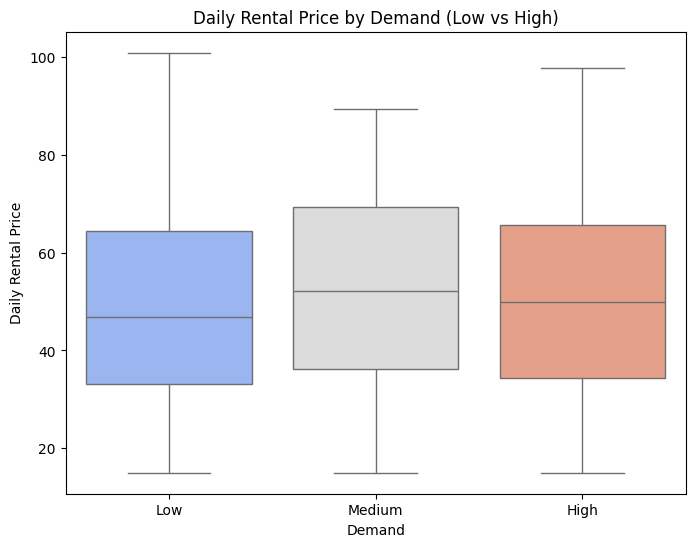

In [358]:
#Rental price by demand
plt.figure(figsize=(8, 6))
sns.boxplot(x='Demand', y='Daily Rental Price', data=df, palette='coolwarm')
plt.title("Daily Rental Price by Demand (Low vs High)")
plt.show()

```Feature Engineering```

In [359]:

# Add new features
df['Car Age'] = 2024 -df['Year of Manufacture']

In [360]:
from sklearn.preprocessing import PolynomialFeatures # Import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias = False)
poly_features = poly.fit_transform(df[['Engine Size (L)']])
# Use get_feature_names_out instead of get_feature_names for newer scikit-learn versions
poly_features_name = poly.get_feature_names_out(['Engine Size (L)']) # Corrected line

#Adding polynomial features to the dataset
poly_df = pd.DataFrame(poly_features,columns=poly_features_name)
df = pd.concat([df,poly_df],axis=1)
df.head()

,Car Make,Car Model,Year of Manufacture,Mileage (in km),Fuel Type,Engine Size (L),Location,Rental Duration (days),Car Condition,Demand,Daily Rental Price,Car Age,Engine Size (L),Engine Size (L)^2
0,Chevrolet,Sedan,2007,16116,Hybrid,1.4,Dallas,29,Old,Low,61.516958,17,1.4,1.96
1,Honda,Convertible,2014,70794,Hybrid,2.9,Los Angeles,26,Old,Medium,41.749576,10,2.9,8.41
2,Kia,Truck,2007,136354,Diesel,5.0,New York,3,Old,Medium,16.358481,17,5.0,25.00
3,Nissan,Convertible,2016,137970,Petrol,5.5,Phoenix,15,Well-Maintained,Low,41.533249,8,5.5,30.25
4,Chevrolet,Convertible,2011,9135,Hybrid,2.0,Chicago,3,New,Medium,79.267099,13,2.0,4.00


In [361]:

from sklearn.decomposition import PCA

# Apply PCa on numerical features
scaler = StandardScaler()
numerical_df_scaled = scaler.fit_transform(numerical_df)
pca = PCA(n_components=5)
pca_result = pca.fit_transform(numerical_df_scaled)


In [362]:

print("Explained Variance Ratio:",pca.explained_variance_ratio_)


Explained Variance Ratio: [0.25102728 0.21707446 0.19782267 0.19461372 0.13946186]


In [363]:
# Save the processed dataset to a CSV file
df.to_csv("EDA.csv", index=False)

print("EDA dataset saved successfully!")


EDA dataset saved successfully!
